# Naive Bayes Classifiers

Naive Bayes is a machine learning classification algorithm that predicts the category of a data point using probability. It assumes that all features are independent of each other. Naive Bayes performs well in many real-world applications such as spam filtering, document categorisation and sentiment analysis.

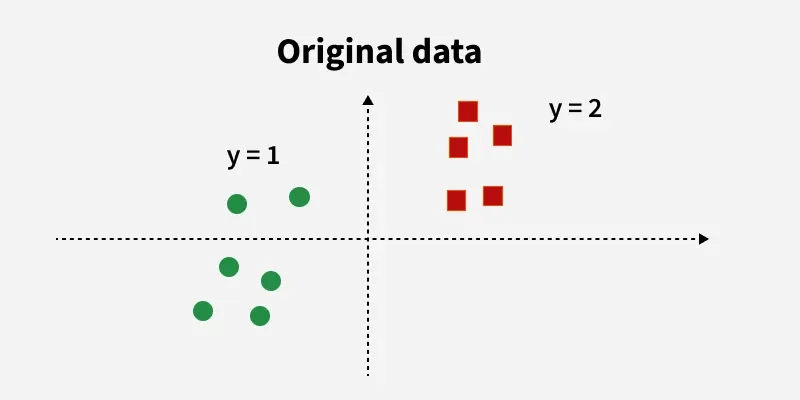

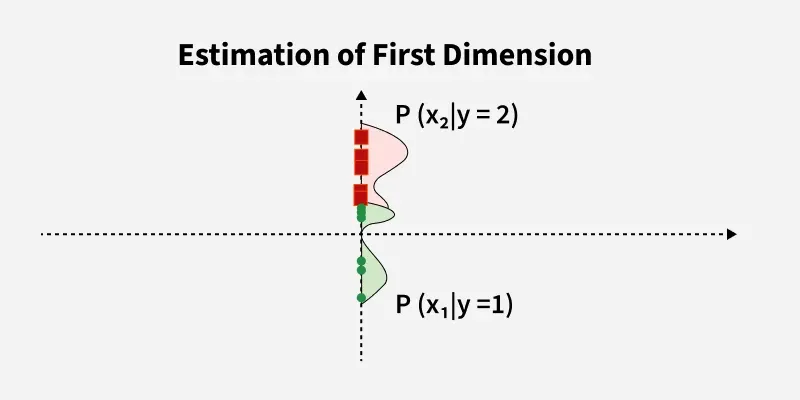

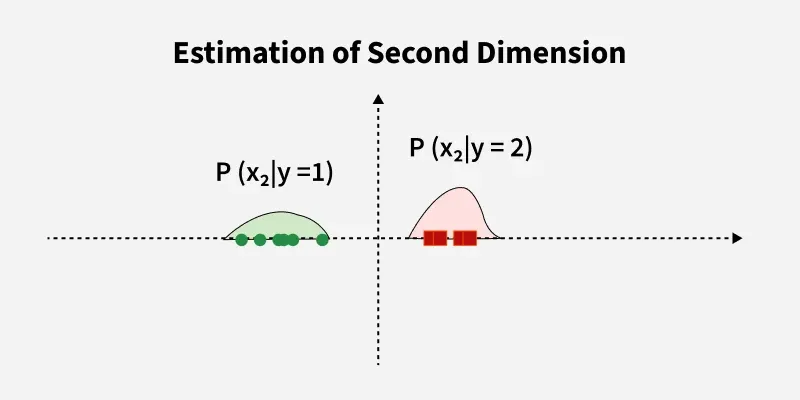

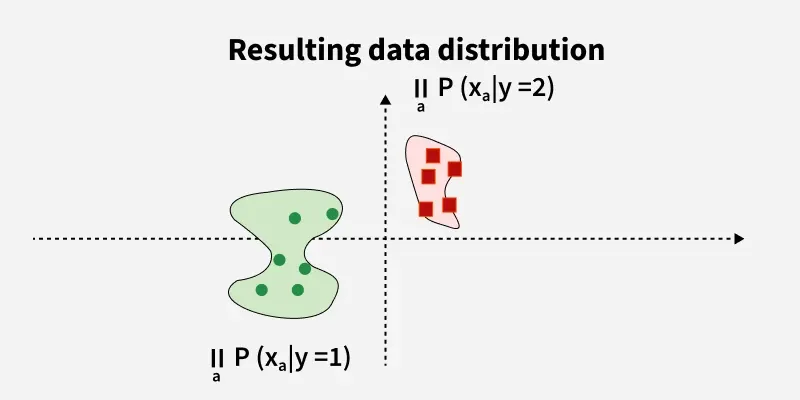

### Key Features of Naive Bayes Classifiers

- **Probabilistic Model**: Naive Bayes is based on Bayes' Theorem, which calculates the probability of a class given the features.
- **Independence Assumption**: It assumes that all features are independent of each other, which simplifies the computation.
- **Fast and Efficient**: Naive Bayes is computationally efficient and works well with large datasets.
- **Handles Categorical Data**: It can handle both continuous and categorical data effectively.
- **Robust to Irrelevant Features**: Naive Bayes can still perform well even when some features are irrelevant.

### Why it is Called Naive Bayes?

The term "naive" refers to the assumption of feature independence, which is often not true in real-world data. Despite this simplification, Naive Bayes classifiers can still perform surprisingly well in practice.

It is named as "Naive" because it assumes the presence of one feature does not affect other features. The "Bayes" part of the name refers to its basis in Bayes’ Theorem.

## Assumption of Naive Bayes

Naive Bayes makes the following assumptions:
1. **Feature Independence**: It assumes that all features are independent of each other given the class label. This means that the presence or absence of one feature does not affect the presence or absence of another feature.

2. **Equal Importance of Features**: It assumes that all features contribute equally to the outcome.

3. **Conditional Independence**: It assumes that the probability of a feature given the class label is independent of the other features.

5 **features are normally distributed:** If a feature is continuous, then it is assumed to be normally distributed within each class.

6 **Discrete features have multinomial distributions:** If a feature is discrete, then it is assumed to have a multinomial distribution within each class.

7 **Features are equally important:** All features are assumed to contribute equally to the prediction of the class label.

8 **No missing data:** The data should not contain any missing values.



## Introduction to Bayes' Theorem

Bayes' Theorem is a fundamental concept in probability theory that describes how to update the probability of a hypothesis based on new evidence. It is named after Thomas Bayes, an 18th-century statistician and theologian.

Bayes Theorem Formula:

$$ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$

Where:
- \( P(A|B) \): Posterior Probability - The probability of event A occurring given that event B has occurred.
- \( P(B|A) \): Likelihood - The probability of event B occurring given that event A has occurred.
- \( P(A) \): Prior Probability - The initial probability of event A occurring.
- \( P(B) \): Marginal Probability - The total probability of event B occurring.

# Naive Bayes Working

1. Terminology

2. The Naive Assumption

3. Constructing the Naive Bayes Classifier

4. Pre-computation from Dataset
Class Probabilities:

5. Calculate Posterior Probabilities

6. Normalize Probabilities

7. Final Prediction

## Types of Naive Bayes Model

* **Gaussian Naive Bayes**: This model assumes that the features follow a normal (Gaussian) distribution. It is commonly used for continuous data.

* **Multinomial Naive Bayes**: This model is used for discrete data, particularly for text classification tasks. It assumes that the features represent the frequency of occurrences of different events.

* **Bernoulli Naive Bayes**: This model is designed for binary/boolean features. It assumes that the features are binary-valued (0 or 1), indicating the presence or absence of a feature.

## Naive Bayes Scratch Implementation using Python

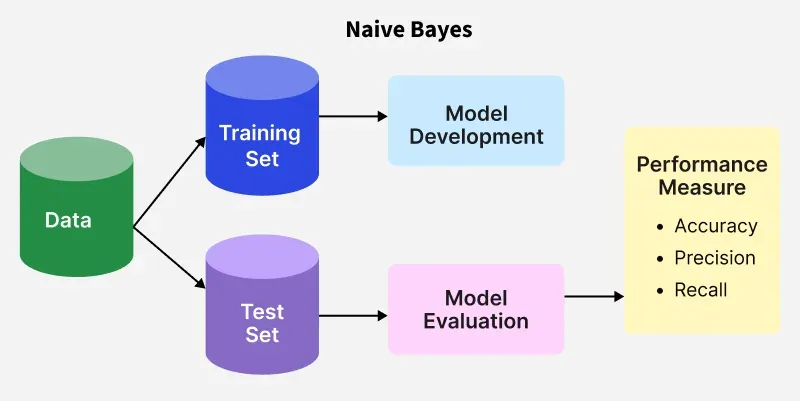


### 1. Importing Libraries

In [1]:
import math
import random
import pandas as pd
import numpy as np

### 2. Encoding Class

In [2]:
def encode_class(mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    return mydata

### 3. Splitting the Data


In [4]:
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    test = list(mydata)
    
    while len(train) < train_num:
        index = random.randrange(len(test))
        train.append(test.pop(index))
    return train, test

### 4. Grouping Data by Class

In [5]:
def groupUnderClass(mydata):
    data_dict = {}
    for i in range(len(mydata)):
        if mydata[i][-1] not in data_dict:
            data_dict[mydata[i][-1]] = []
        data_dict[mydata[i][-1]].append(mydata[i])
    return data_dict

### 5. Calculating Mean and Standard Deviation for Class

In [6]:
def MeanAndStdDev(numbers):
    avg = np.mean(numbers)
    stddev = np.std(numbers)
    return avg, stddev

def MeanAndStdDevForClass(mydata):
    info = {}
    data_dict = groupUnderClass(mydata)
    for classValue, instances in data_dict.items():
        info[classValue] = [MeanAndStdDev(attribute) for attribute in zip(*instances)]
    return info

### 6. Calculating Gaussian and Class Probabilities

In [7]:
def calculateGaussianProbability(x, mean, stdev):
    epsilon = 1e-10
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
    return (1 / (math.sqrt(2 * math.pi) * (stdev + epsilon))) * expo

def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

### 7. Predicting for Test Set

In [8]:
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel = max(probabilities, key=probabilities.get)
    return bestLabel

def getPredictions(info, test):
    predictions = [predict(info, instance) for instance in test]
    return predictions

### 8. Calculating Accuracy

In [9]:
def accuracy_rate(test, predictions):
    correct = sum(1 for i in range(len(test)) if test[i][-1] == predictions[i])
    return (correct / float(len(test))) * 100.0

### 9. Loading and Preprocessing Data

In [15]:
filename = 'https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/Naivs_diabetes.csv' 
df = pd.read_csv(filename, comment='#')
mydata = df.values.tolist()

mydata = encode_class(mydata)
for i in range(len(mydata)):
    for j in range(len(mydata[i]) - 1):
        mydata[i][j] = float(mydata[i][j])

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outlier
0,4,122,61,7,52,27.822196,0.635762,48,0,0
1,1,104,56,11,0,24.245030,0.089848,60,0,0
2,3,109,62,23,0,18.876902,0.332317,61,0,0
3,3,117,87,21,108,30.492157,0.405408,25,1,0
4,2,114,56,28,10,23.147904,0.120256,25,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1,87,66,8,82,25.919825,0.237532,65,1,0
996,3,156,75,21,5,16.830370,0.165928,61,1,0
997,0,105,55,12,198,25.625502,0.380023,22,1,0
998,3,151,64,25,0,34.498791,0.321169,39,0,0


### 10. Splitting Data into Training and Testing Sets

In [17]:
ratio = 0.7
train_data, test_data = splitting(mydata, ratio)

print('Total number of examples:', len(mydata))
print('Training examples:', len(train_data))
print('Test examples:', len(test_data))

Total number of examples: 1000
Training examples: 700
Test examples: 300


### 11. Training and Testing the Model

In [18]:
info = MeanAndStdDevForClass(train_data)

predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 100.0


### 12. Evaluating Model


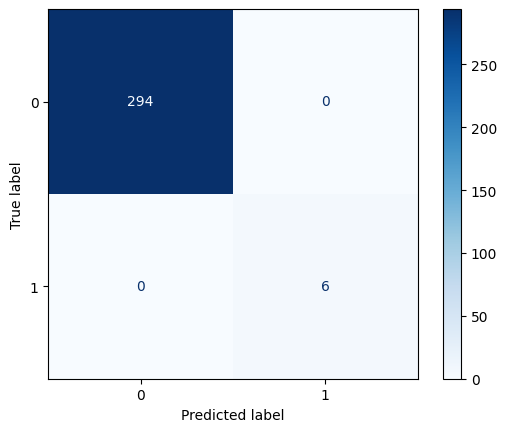

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [row[-1] for row in test_data]
y_pred = predictions

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### 2. Precision, Recall and F1 score

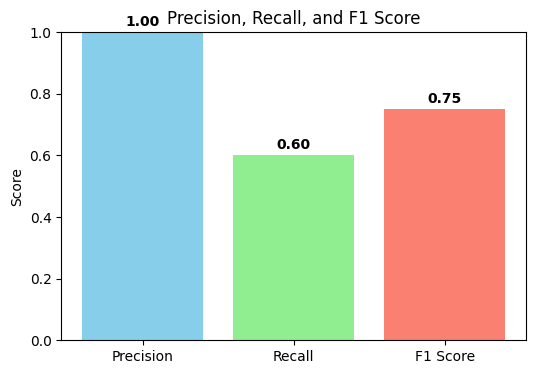

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

actual = [0, 1, 1, 0, 1, 0, 1, 1]
predicted = [0, 1, 0, 0, 1, 0, 1, 0]

precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)
f1 = f1_score(actual, predicted)

metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    
plt.show()